# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path_dir = '/content/drive/MyDrive/Data Analysis/dacon/seoul-bike-sharing'
file_list = os.listdir(path_dir)
print(file_list)

['sample_submission.csv', 'test.csv', 'train.csv', 'seoul-bicycle-demand.ipynb']


In [4]:
data_train = pd.read_csv(path_dir + '/train.csv')
data_test = pd.read_csv(path_dir + '/test.csv')

In [5]:
df_train = data_train.copy()
df_test = data_test.copy()

In [6]:
print(df_train.shape)
df_train

(273, 10)


,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053


Train data : 직전 3개년(18-20년)의 4~6월 데이터가 존재

In [7]:
print(df_test.shape)
df_test

(91, 9)


,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459
...,...,...,...,...,...,...,...,...,...
86,2021-06-26,177.149,3.980,0.223,1.066,74.628,20.312,28.579,36.486
87,2021-06-27,138.723,2.777,0.135,1.290,70.236,20.812,29.000,18.378
88,2021-06-28,111.095,3.338,1.270,1.692,70.338,21.000,28.789,35.946
89,2021-06-29,171.622,3.270,0.595,1.470,70.473,21.000,29.421,27.770


Test data : 2021년 4~6월 데이터가 존재

# 컬럼 정보

- date_time : 일별 날짜

- wind_direction: 풍향 (degree)

- sky_condition : 하늘 상태 (하단 설명 참조)

- precipitation_form : 강수 형태 (하단 설명 참조)

- wind_speed : 풍속 (m/s)

- humidity : 습도 (%)

- low_temp : 최저 기온 ( `C)

- high_temp : 최고 기온 ( `C)

- Precipitation_Probability : 강수 확률 (%)

- __`number_of_rentals : 따릉이 대여량`__

- __데이터 상세 설명__
  - 기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.

  - 2019년 6월 4일 까지 sky_condition (하늘 상태) 코드  : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)

  - 2020년  sky_condition (하늘 상태) 코드  : 맑음(1), 구름많음(3), 흐림(4)

  - precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
  
  - 원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.

# 탐색적 데이터 분석(EDA)

## 결측치 확인

In [8]:
df_train.isnull().sum()

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
number_of_rentals            0
dtype: int64

In [9]:
def check_missing_col(dataframe):
  counted_missing_col = 0
  for i, col in enumerate(df_train.columns):
    missing_values = sum(df_train[col].isnull())
    is_missing = True if missing_values >= 1 else False
    if is_missing:
      counted_missing_col += 1
      print(f'결측치가 있는 컬럼은: {col}입니다')
      print(f'총 {missing_values}개의 결측치가 존재합니다.')

    if i == len(df_train.columns) - 1 and counted_missing_col == 0:
      print('결측치가 존재하지 않습니다.')

check_missing_col(df_train)

결측치가 존재하지 않습니다.


## date time 날짜처리

In [10]:
def seperate_datetime(dataframe):
  year = []
  month = []
  day = []

  for date in dataframe.date_time:
    year_point, month_point, day_point = date.split('-')  # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
    year.append(int(year_point))
    month.append(int(month_point))
    day.append(int(day_point))
  return year, month, day

year, month, day = seperate_datetime(df_train)

df_train['year'] = year
df_train['month'] = month
df_train['day'] = day

# 동일한 결과를 만드는 코드
# df_train['date_time'] = pd.to_datetime(df_train['date_time'], format='%Y-%m-%d')
# df_train['year'] = df_train['date_time'].dt.year
# df_train['month'] = df_train['date_time'].dt.month
# df_train['day'] = df_train['date_time'].dt.day

## 요일 표시

In [21]:
week_day = pd.to_datetime(df_train['date_time']).dt.day_name()
df_train['week_day'] = week_day
df_train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,Wednesday
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,Thursday


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
 10  year                       273 non-null    int64  
 11  month                      273 non-null    int64  
 12  day                        273 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 2

## 기초 통계분석

In [13]:
df_train_description = df_train.describe()
df_train_description

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022,2019.000000,5.000000,15.670330
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774,0.817996,0.813489,8.774195
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000,2018.000000,4.000000,1.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000,2018.000000,4.000000,8.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000,2019.000000,5.000000,16.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000,2020.000000,6.000000,23.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000,2020.000000,6.000000,31.000000


숫자로만 봐서는 분포를 가늠하기 힘들기 때문에 각각의 데이터 분포를 히스토그램으로 그려본다.

각 데이터의 히스토그램에 평균(빨강)과 중앙값(초록)을 선으로 표시해서 분석을 용이하게 해준다.

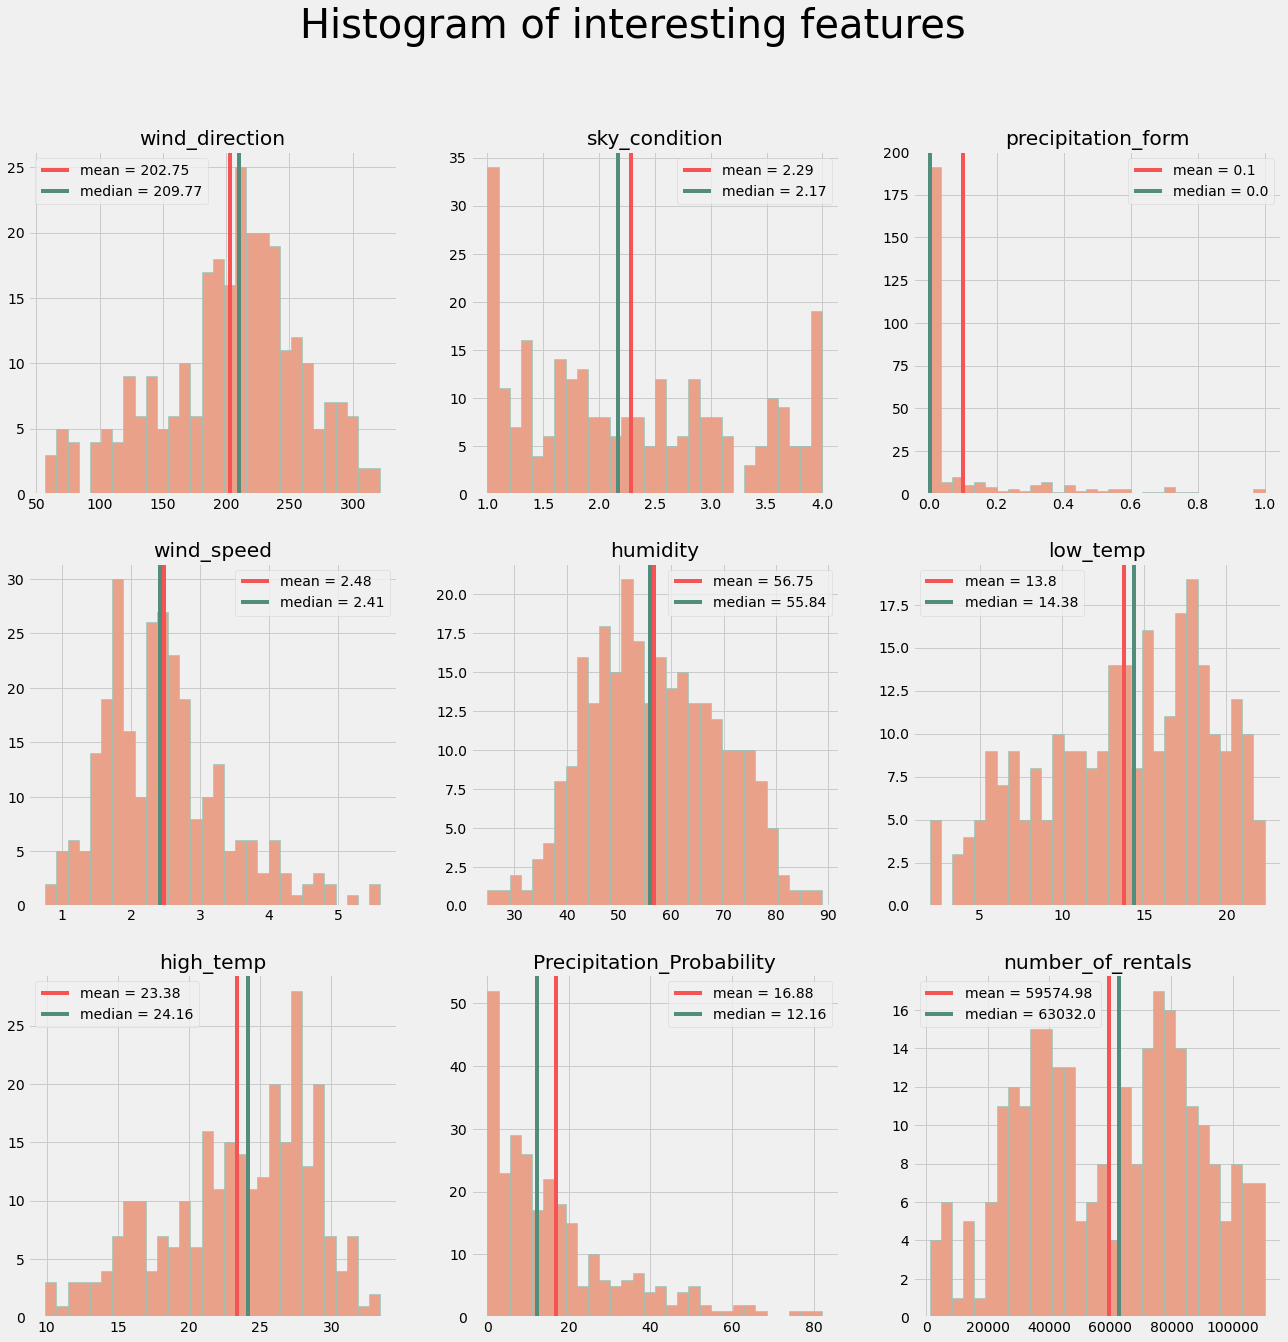

In [19]:
interest_coloumns = ['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed', 'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability', 'number_of_rentals']

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(3,3, figsize=(20,20))
fig.suptitle('Histogram of interesting features', fontsize=40)  # fontsize로 폰트 크기를 조정할 수 있따

column_idx = 0 
for i in range(3):  
  for j in range(3):
    ax[i][j].hist(df_train[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
    ax[i][j].set_title(interest_coloumns[column_idx])
    ax[i][j].axvline(df_train_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(df_train_description[interest_coloumns[column_idx]]['mean'], 2)}")
    ax[i][j].axvline(df_train_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(df_train_description[interest_coloumns[column_idx]]['50%'], 2)}")
    ax[i][j].legend()
    column_idx += 1

wind_direction을 살펴보면 평균 202, 가장 분포가 많이 되어있는 값이 200 - 250의 값입니다.

주어진 데이터가 4, 5, 6월의 데이터라는 사실을 떠올려보세요.

4, 5, 6월은 봄이 가고 여름이 오는 시기로 이때는 양쯔강 기단에 의해 남서풍이 많이 부는 시기입니다.

만약 날짜 데이터가 주어지지 않고 풍향, 습도 등 기상 데이터만 주어졌다면 여러분은 대략 4, 5, 6월의 데이터라고 유추할 수도 있었을 것입니다.

## 각 feature 간의 상관관계 확인하기

In [22]:
 # 상관분석은 숫자로 계산할 수 있으므로 데이터에서 숫자로 이루어진 컬럼만을 뽑겠습니다 (date_time drop)
df_train_number = df_train.select_dtypes(np.number)

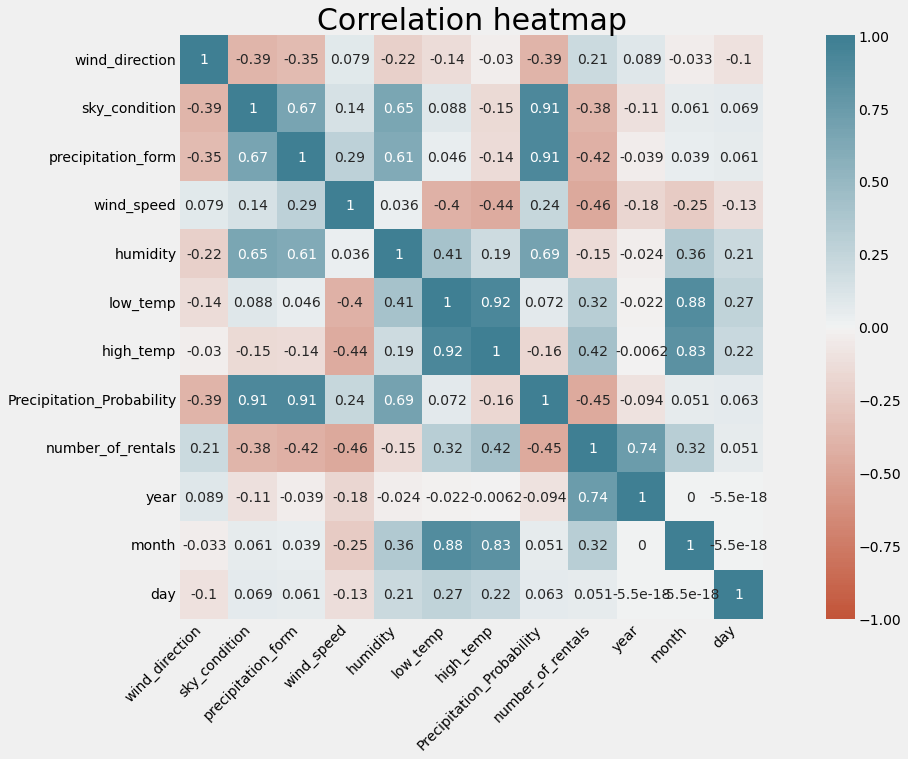

In [26]:
corr = df_train_number.corr()

plt.figure(figsize=(20,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, 
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation=45,
                   horizontalalignment='right')
plt.title('Correlation heatmap', fontsize=30)
plt.show()

우리가 가장 관심있는 것은 따릉이 대여량(number_of_rentals)과 어떤 컬럼이 가장 상관관계가 높은가 입니다.

그래프를 보니 years가 가장 높은 양의 상관관계가 있는것으로 나타났네요!

이는 시간이 지날수록 따릉이 가입자 수가 늘어났기 때문이라고 해석할 수 있겠습니다.

자 그럼 날짜별로 총 대여량이 얼마나 되는지 확인해보겠습니다.

In [28]:
year_rentals = df_train.groupby('year')['number_of_rentals'].sum()
month_rentals = df_train.groupby('month')['number_of_rentals'].sum()
day_rentals = df_train.groupby('day')['number_of_rentals'].sum()

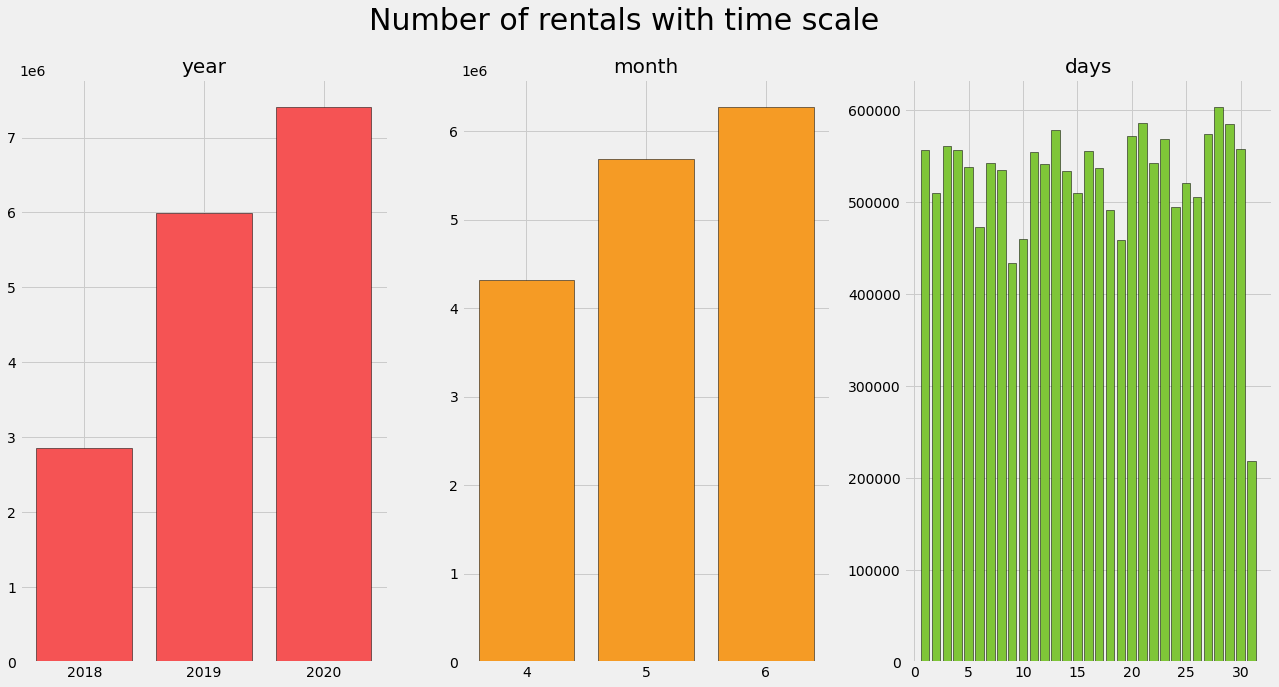

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(20,10))
fig.suptitle('Number of rentals with time scale', fontsize=30)

ax[0].bar(x=['2018', '2019', '2020'], height=year_rentals, color='#f55354', edgecolor='black')
ax[0].set_title('year', fontsize=20)

ax[1].bar(x=['4','5','6'], height=month_rentals, color='#f59b25', edgecolor='black')
ax[1].set_title('month', fontsize=20)

ax[2].bar(x=day_rentals.index.to_list(), height=day_rentals, color='#7fc638', edgecolor='black')
ax[2].set_title('days', fontsize=20)

plt.show()

4월에서 6월로 갈수록 대여량 수가 늘어나는데요 점점 날이 따뜻해지면서 사용자가 많아지기 때문일까요?

In [32]:
day_table = df_train.groupby(['week_day']).sum()
day_table = day_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

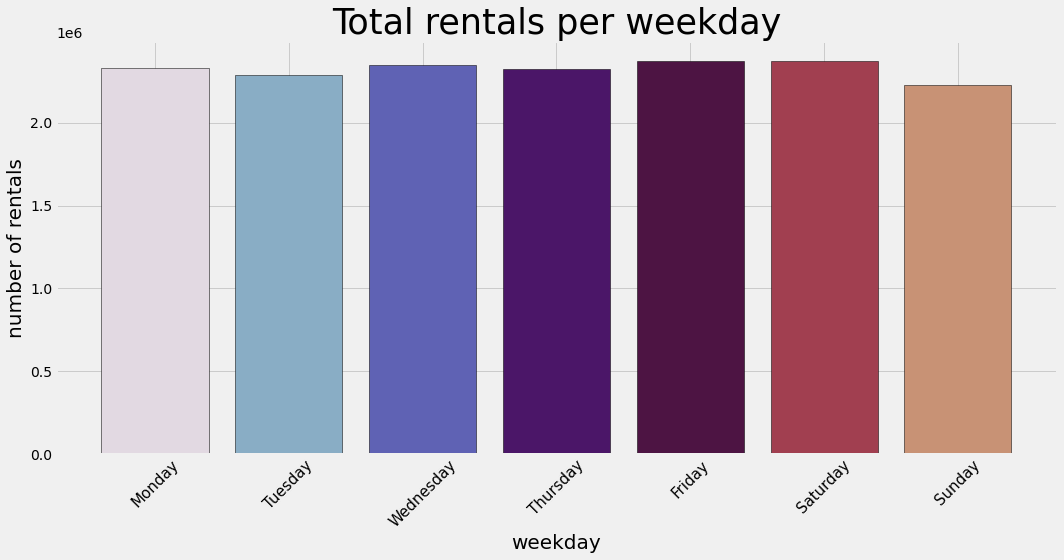

In [34]:
plt.figure(figsize=(15,8))
color_map = plt.get_cmap('twilight')
color_list = [color_map.colors[i] for i in range(0, 512, 72)]
plt.bar(day_table.index, day_table.number_of_rentals, edgecolor='black', color=color_list)
plt.xticks(rotation=45, fontsize=15)
plt.title("Total rentals per weekday", fontsize=35)
plt.xlabel('weekday', fontsize=20)
plt.ylabel('number of rentals', fontsize=20)
plt.tight_layout()  # adjust the padding between and around subplots
plt.show()

토요일에 따릉이 대여량이 가장 많기는 하지만 요일의 영향은 미미해 보인다.

## 강수확률, 하늘상태 산점도
굉장히 높은 상관관계를 보인 강수확률과 하늘상태의 산점도를 그려보고

점의 크기를 대여량(크면 클수록 대여량이 높음), 색깔로 년도를 구분해보겠습니다.

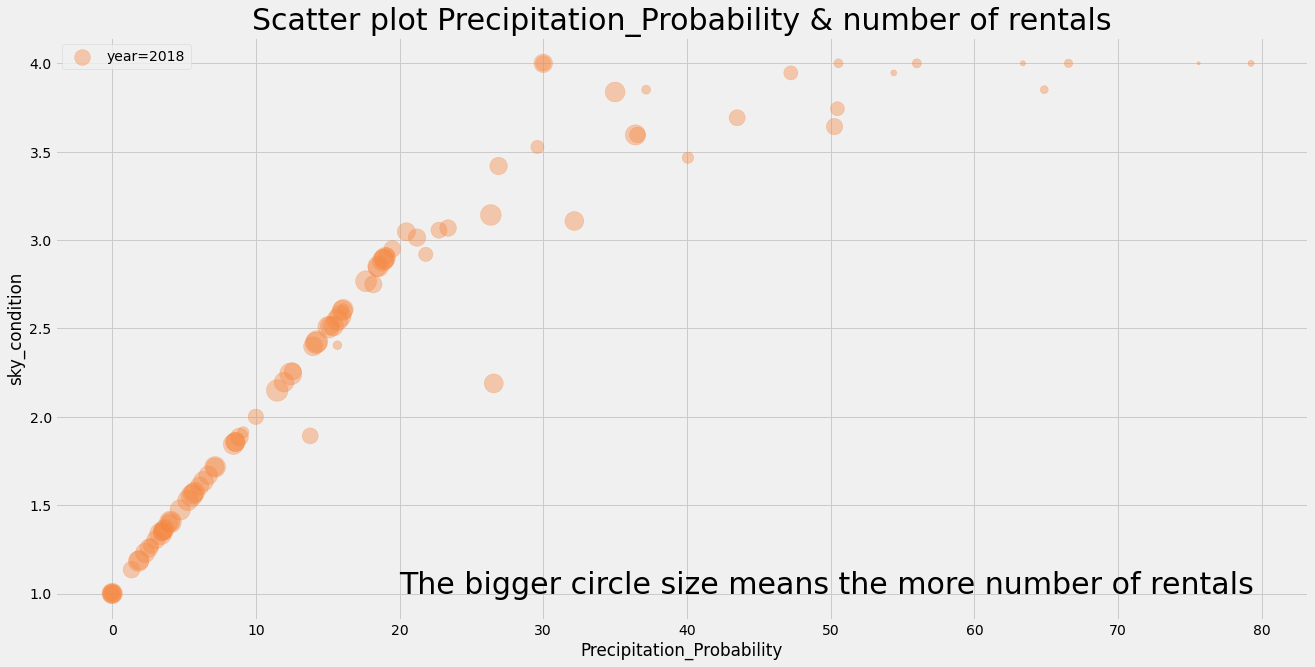

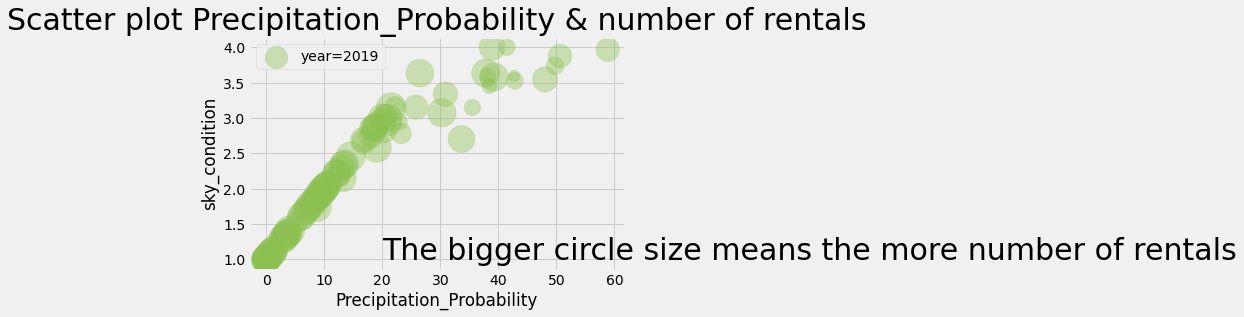

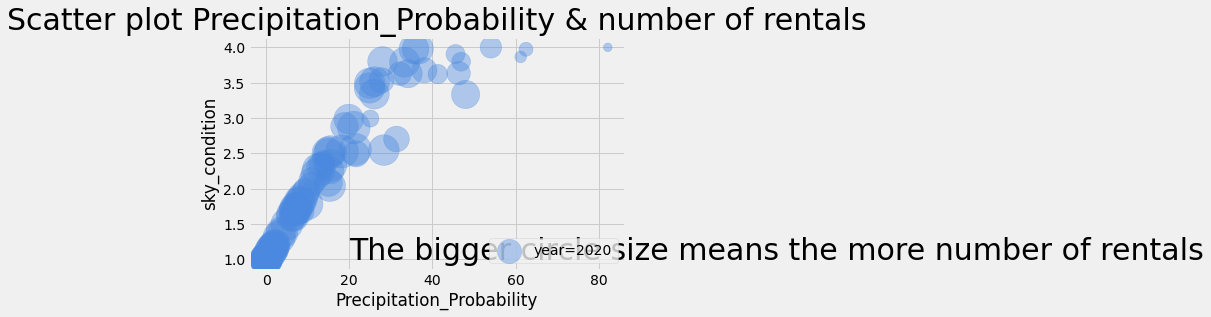

In [39]:
years = [2018, 2019, 2020]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20,10))

for year, color in zip(years, colors):

  precipitation_prb = df_train[df_train['year'] == year].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
  rentals = df_train[df_train['year'] == year].sort_values(by='Precipitation_Probability')['number_of_rentals']
  sky_condition = df_train[df_train['year'] == year].sort_values(by='Precipitation_Probability')['sky_condition']

  plt.scatter(x=precipitation_prb, y=sky_condition, s=rentals/100, alpha=0.4, c=color, label=f'year={year}')
  plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=30)
  plt.xlabel('Precipitation_Probability')
  plt.ylabel('sky_condition')
  plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize=30)  # 20, 1.0 좌표에 텍스트 입력
  plt.legend()
  plt.show()

for문으로 각각 그래프를 그린뒤 산점도 그래프를 다시 한번 그래주는 코드

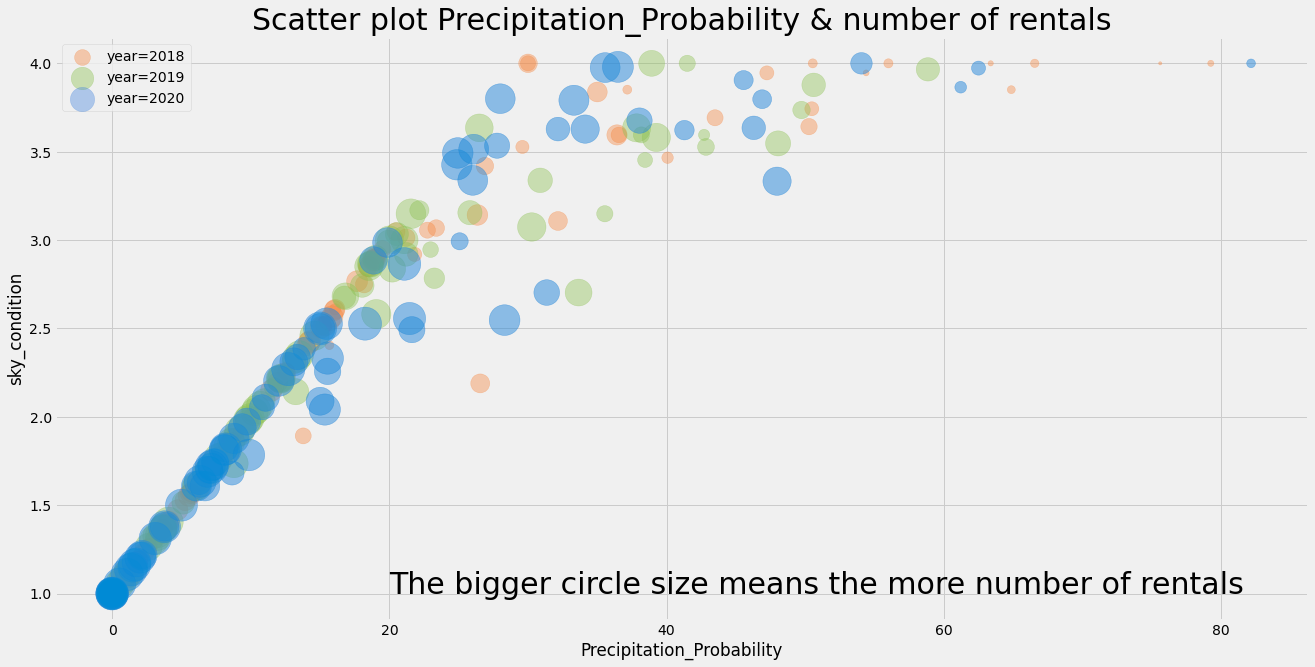

In [35]:
years = [2018, 2019, 2020]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20,10))

for year, color in zip(years, colors):

  precipitation_prb = df_train[df_train['year'] == year].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
  rentals = df_train[df_train['year'] == year].sort_values(by='Precipitation_Probability')['number_of_rentals']
  sky_condition = df_train[df_train['year'] == year].sort_values(by='Precipitation_Probability')['sky_condition']

  plt.scatter(x=precipitation_prb, y=sky_condition, s=rentals/100, alpha=0.4, c=color, label=f'year={year}')

plt.scatter(x=precipitation_prb, y=sky_condition, s=rentals/100, alpha=0.2)
plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=30)
plt.xlabel('Precipitation_Probability')
plt.ylabel('sky_condition')
plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize=30)  # 20, 1.0 좌표에 텍스트 입력
plt.legend()
plt.show()

가장 눈에 띄는건 강수확률이 낮으면 낮을수록 하늘 상태의 값도 낮아진다는점(맑음), 강수 확률이 높을수록 점의 크기가 작아진다는점(대여량이 줄어듦) 등이 있습니다.

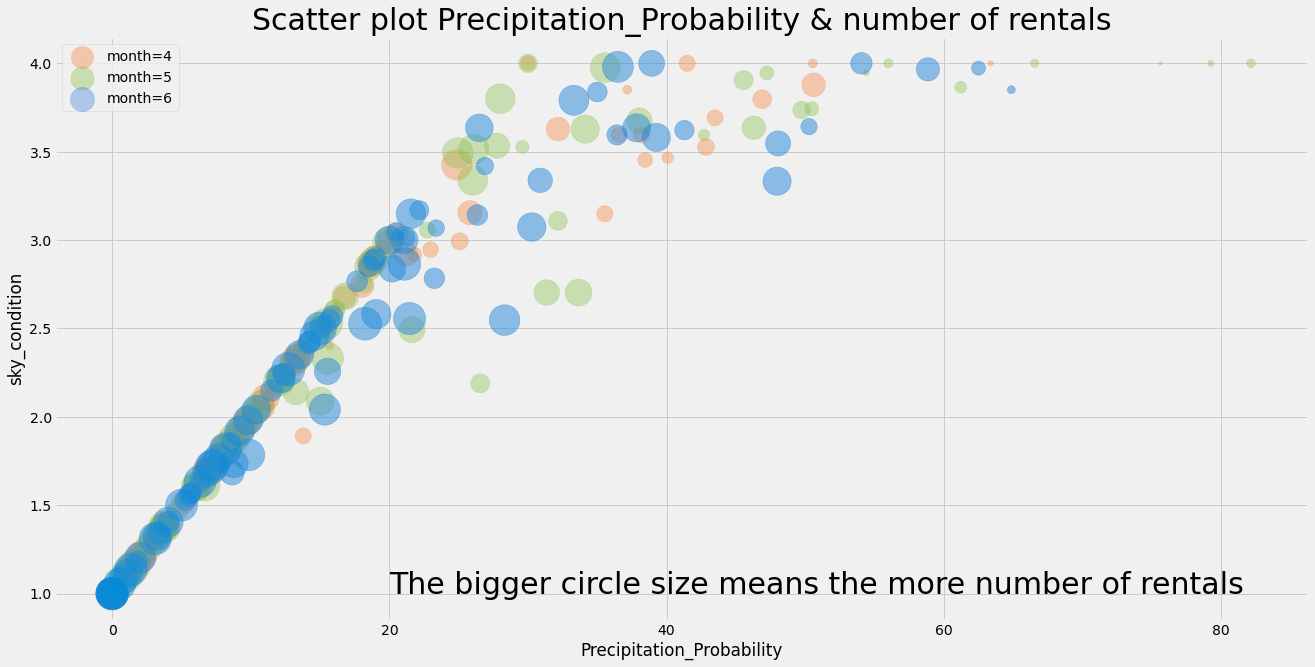

In [38]:
# 산점도를 월별로 표시하기
monthes = [4, 5, 6]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20, 10))

for month, color in zip(monthes, colors):
    
  precipitation_prb = df_train[df_train['month'] == month].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
  rentals = df_train[df_train['month'] == month].sort_values(by='Precipitation_Probability')['number_of_rentals']
  sky_condition = df_train[df_train['month'] == month].sort_values(by='Precipitation_Probability')['sky_condition']
    
  plt.scatter(precipitation_prb, sky_condition, s=rentals/100, alpha=0.4, c=color, label=f'month={month}')

plt.scatter(precipitation_prb, sky_condition,s=rentals/100, alpha=0.2)
plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=30)
plt.xlabel('Precipitation_Probability')
plt.ylabel('sky_condition')
plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize= 30)
plt.legend()
plt.show()